In [1]:
import os
import cv2
import matplotlib.pyplot as plt

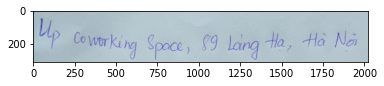

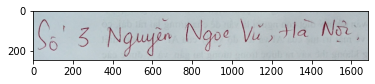

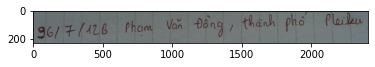

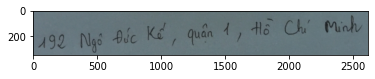

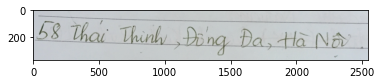

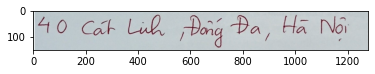

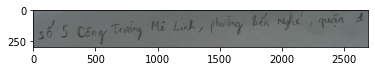

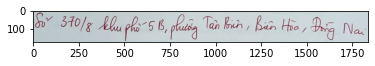

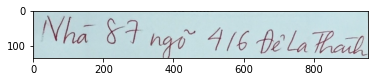

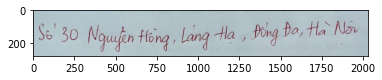

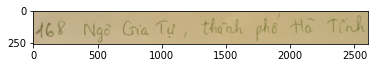

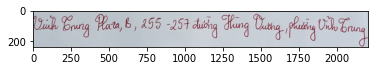

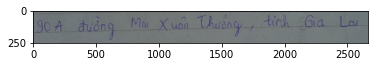

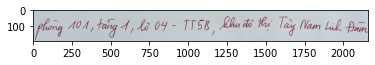

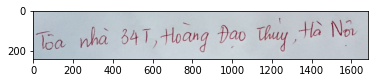

In [2]:
DATA_SAMPLE_FOLDER = '0825_DataSamples 1'
for image_name in os.listdir(DATA_SAMPLE_FOLDER):
    if '.json' in image_name:
        continue

    image_path = os.path.join(DATA_SAMPLE_FOLDER, image_name)
    image = cv2.imread(image_path)
    plt.imshow(image)
    plt.show()

In [3]:
TRAIN_FOLDER = '0916_Data Samples 2'
TEST_FOLDER = '1015_Private Test'

train_image_paths = [os.path.join(TRAIN_FOLDER, image_name) for image_name in os.listdir(TRAIN_FOLDER) if '.json' not in image_name]
train_image_paths[:5]

['0916_Data Samples 2/0105_samples.png',
 '0916_Data Samples 2/1451_samples.png',
 '0916_Data Samples 2/1645_samples.png',
 '0916_Data Samples 2/0330_samples.png',
 '0916_Data Samples 2/1256_samples.png']

In [4]:
print('Num of training images:', len(train_image_paths))

Num of training images: 1823


In [5]:
test_image_paths = [os.path.join(TEST_FOLDER, image_name) for image_name in os.listdir(TEST_FOLDER) if '.json' not in image_name]
test_image_paths[:5]
print('Num of training images:', len(test_image_paths))

Num of training images: 549


In [6]:
NEW_TRAIN_FOLDER = './data/train/images'
NEW_VALIDATION_FOLDER = './data/validation/images'
NEW_TEST_FOLDER = './data/test/images'

for folder in [NEW_TRAIN_FOLDER, NEW_VALIDATION_FOLDER, NEW_TEST_FOLDER]:
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)

In [7]:
import random

validation_image_paths = random.choices(train_image_paths, k=int(0.2*len(train_image_paths)))
train_image_paths = list(set(train_image_paths).difference(set(validation_image_paths)))

In [8]:
print('Number of training images:', len(train_image_paths))
print('Number of validation images:', len(validation_image_paths))
print('Number of testing images:', len(test_image_paths))

Number of training images: 1499
Number of validation images: 364
Number of testing images: 549


In [9]:
import shutil

def copy_images_to_folder(image_paths, to_folder):
    for path in image_paths:
        shutil.copy2(path, to_folder)
        
copy_images_to_folder(train_image_paths, NEW_TRAIN_FOLDER)
copy_images_to_folder(validation_image_paths, NEW_VALIDATION_FOLDER)
copy_images_to_folder(test_image_paths, NEW_TEST_FOLDER)

In [26]:
import json

train_labels = {}
valid_labels = {}
train_images = [image for image in os.listdir('data/train/images') if '.json' not in image]
valid_images = [image for image in os.listdir('data/validation/images') if '.json' not in image]
LABEL_FILE = f'{TRAIN_FOLDER}/labels.json'



In [25]:
f = open(LABEL_FILE)
labels = json.load(f)
for train_image in train_images:
    if train_image in labels:
        train_labels.update({train_image: labels[train_image]})
train_object = json.dumps(train_labels, ensure_ascii=False, indent=4)
for valid_image in valid_images:
    if valid_image in labels:
        valid_labels.update({valid_image: labels[valid_image]})
valid_object = json.dumps(valid_labels, ensure_ascii=False, indent=4)
f.close()
with open('train_labels.json', 'w') as trainfile:
    trainfile.write(train_object)

with open('valid_labels.json', 'w') as validfile:
    validfile.write(valid_object)